In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
data=pd.read_csv(r"E:\pandas\machine learning\linear regression\FuelConsumption.csv.csv")
data=data[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
data.rename(columns={'FUELCONSUMPTION_COMB_MPG':'comubstion', 'CO2EMISSIONS':'emission'},inplace=True)

In [79]:
data.head()

,comubstion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


In [80]:
data.shape

(1067, 2)

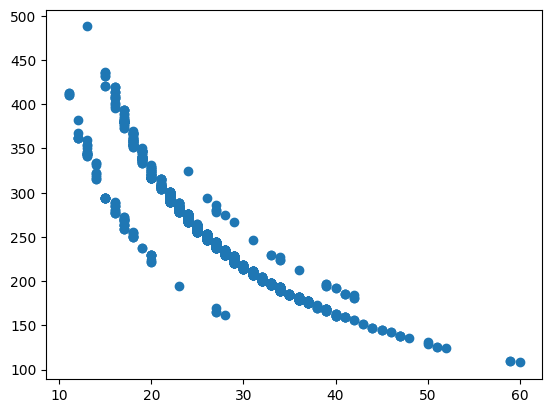

In [81]:
plt.scatter(data.comubstion,data.emission)

In [82]:
X=data.iloc[:,0:1].values
y=data.iloc[:,-1].values

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [85]:
L.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
y_pred=L.predict(X_test)

In [87]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8261445883060663
RMSE 27.0911073218799


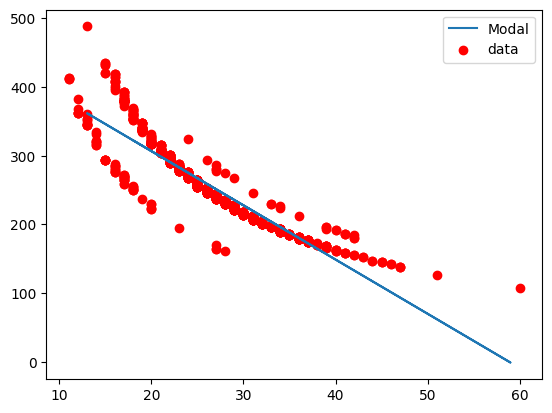

In [88]:
plt.plot(X_test,L.predict(X_test),label="Modal")
plt.scatter(X_train,y_train,label="data", color="r")
plt.legend()
plt.show()

Polynomial Regression

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

In [90]:
X_poly = poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(853, 11)


array([[1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        5.48758735e+10, 1.20726922e+12, 2.65599228e+13],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        1.69835630e+10, 3.22687698e+11, 6.13106626e+12],
       [1.00000000e+00, 2.70000000e+01, 7.29000000e+02, ...,
        2.82429536e+11, 7.62559748e+12, 2.05891132e+14],
       ...,
       [1.00000000e+00, 2.40000000e+01, 5.76000000e+02, ...,
        1.10075314e+11, 2.64180754e+12, 6.34033810e+13],
       [1.00000000e+00, 2.10000000e+01, 4.41000000e+02, ...,
        3.78228594e+10, 7.94280047e+11, 1.66798810e+13],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, ...,
        1.52587891e+11, 3.81469727e+12, 9.53674316e+13]], shape=(853, 11))

In [91]:
L1 = LinearRegression()
L1.fit(X_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
X_test_poly =poly.fit_transform(X_test)

In [93]:
y_pred=L1.predict(X_test_poly)

In [94]:
print("R2 score",r2_score(y_test,y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8940836971660773
MSE 21.14530998617343


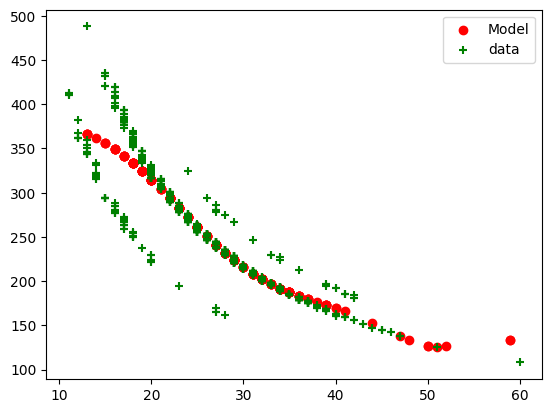

In [95]:
plt.scatter(X_test,y_pred, label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()

In [96]:
def polynomialRegression(X,y,k=14):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

  poly = PolynomialFeatures(degree=k)
  X_poly = poly.fit_transform(X_train)
  lr = LinearRegression()
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)
  
  return training_score, test_score

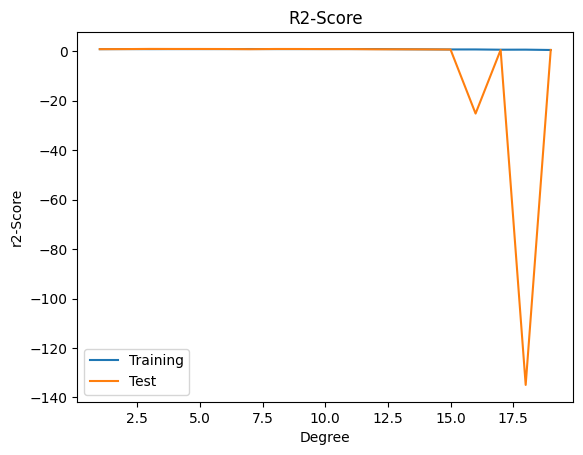

In [97]:
train=[]
test=[]
for i in range(1,20):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("R2-Score");
plt.show()